# Packages

In [5]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Others
import os

# Setting parameters
sns.set_palette("dark")
sns.set_style("whitegrid")

os.chdir(r'J:\Estudo\Projetos\telecom_churn_prediction')

pd.set_option('display.max_columns', 25)

# Data Overview

## Importing 

In [6]:
df = pd.read_csv(r'data\telco_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
rows, columns = df.shape

print(f'There are {rows} rows, and {columns} columns')

There are 7043 rows, and 21 columns


## Missing values
- There are no missing values

In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Analysis on each column

## Gender
- Desc: The customer’s gender: Male, Female
- Dtype: String
- Obs:
    - Looks like gender doesn'n affect if 

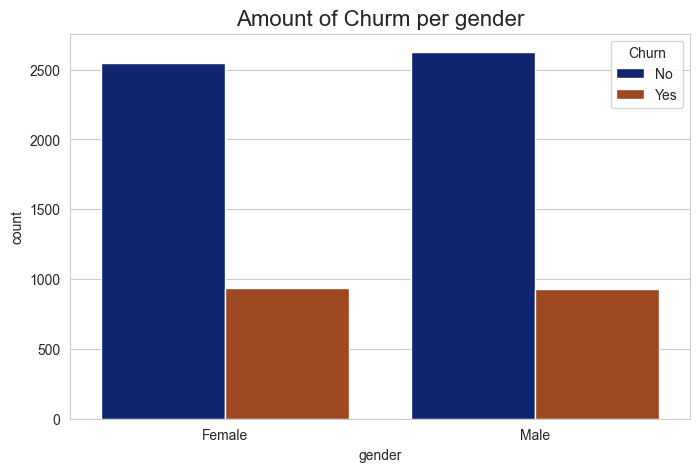

In [23]:
plt.figure(figsize = (8, 5))

sns.countplot(
    x = 'gender',
    data = df,
    hue = 'Churn'
)
plt.title('Amount of Churm per gender', fontsize = 16)
plt.show()